In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def load_yelp_reviews(is_train=True):
    path = './data/'
    if is_train:
        path += 'train.csv'
    else:
        path += 'test.csv'
    dataset = pd.read_csv(path, encoding='utf-8',delimiter=',', header=None)
    dataset.columns = ['target', 'review']

    dataset.replace({'target': {1: 0}}, inplace=True)

    # preprocessing here
    # dataset.review = dataset.review.apply(preprocess)
    return dataset

In [6]:
dataset = load_yelp_reviews(is_train=True)

(array([280383., 162345.,  64962.,  27264.,  12439.,   5901.,   2948.,
          1579.,   1012.,   1167.]),
 array([1.0000e+00, 5.2820e+02, 1.0554e+03, 1.5826e+03, 2.1098e+03,
        2.6370e+03, 3.1642e+03, 3.6914e+03, 4.2186e+03, 4.7458e+03,
        5.2730e+03]),
 <a list of 10 Patch objects>)

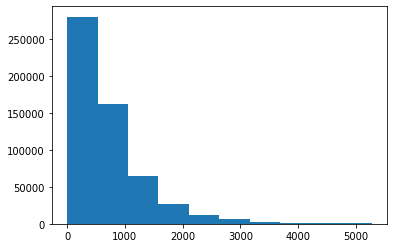

In [7]:
plt.hist(dataset.review.str.len())

In [8]:
import regex

def crop_review(text):
    cropped_review = regex.split(r'[\.|?|!]', text)
    return cropped_review[0]

In [9]:
dataset.review = dataset.review.apply(crop_review)

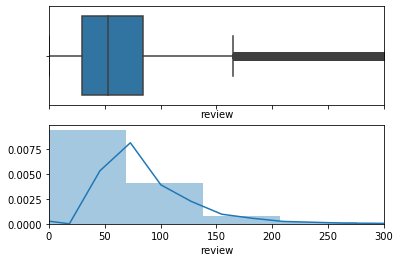

In [42]:
len_data = dataset.review.str.len()

fig, (box, hist) = plt.subplots(2, sharex=True)
hist.set_xlim(0, 300)

sns.boxplot(len_data, ax=box)
sns.distplot(len_data, ax=hist)


In [45]:
iqr = stats.iqr(len_data)
median = np.median(len_data)

print(iqr, median)

lower_range = int(median - iqr/2)
upper_range = int(median + iqr/2)

print(lower_range, upper_range)

54.0 53.0
26 80


In [58]:
# cutting out reviews within range 
dataset = dataset[(dataset.review.str.len()>=lower_range) & (dataset.review.str.len()<=upper_range)]

(array([38346., 31683., 37513., 29951., 28840., 32504., 25297., 27954.,
        21102., 22785.]),
 array([26. , 31.4, 36.8, 42.2, 47.6, 53. , 58.4, 63.8, 69.2, 74.6, 80. ]),
 <a list of 10 Patch objects>)

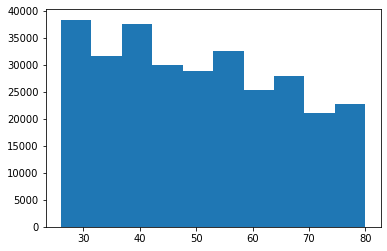

In [61]:
plt.hist(dataset.review.str.len())

In [62]:
print(len(dataset))

295975


In [68]:
pos_samples = int(dataset.target.sum()/2)
neg_samples = len(dataset)-pos_samples

print(pos_samples, neg_samples)

150291 145684


In [74]:
dataset = dataset.reset_index(drop=True)

In [80]:
max(dataset.review.str.len())

80